In [ ]:
#Colab資料夾設定方法
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/Colab Notebooks/water_segmentation')
os.listdir()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['SuiSiann.csv',
 'DIP_HW2.ipynb',
 '__pycache__',
 'water_segmentation',
 'mask',
 'image',
 'result',
 'input.jpg',
 'output_tone.csv',
 'lexicon.txt',
 'train-toneless.csv',
 'input1.jpg',
 'input2.jpg',
 'Untitled0.ipynb',
 'Segmentation_Conventional.ipynb',
 'result.csv',
 'output.csv',
 'Untitled1.ipynb',
 'test_data']

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings( "ignore")

def calculateIoU2(gtMask, predMask):
    tp = 0
    fp = 0
    fn = 0

    for i in range(len(gtMask)):
        for j in range(len(gtMask[0])):
            if gtMask[i][j] == 255 and predMask[i][j] == 255:
                tp += 1
            elif gtMask[i][j] == 255 and predMask[i][j] == 0:
                fp += 1
            elif gtMask[i][j] == 0 and predMask[i][j] == 255:
                fn += 1

    return tp, (tp + fp + fn)


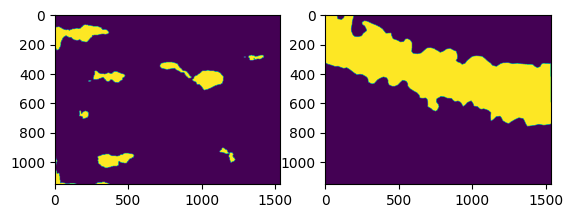

0.09556008913942074


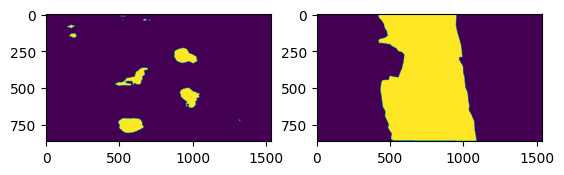

0.09361982943988874


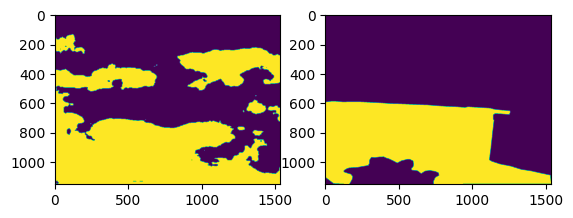

0.45978981606198543


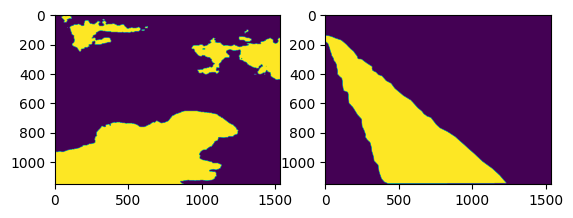

0.34293477680050444


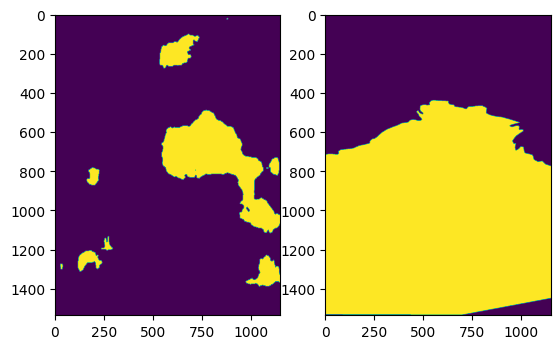

0.16318443804034583


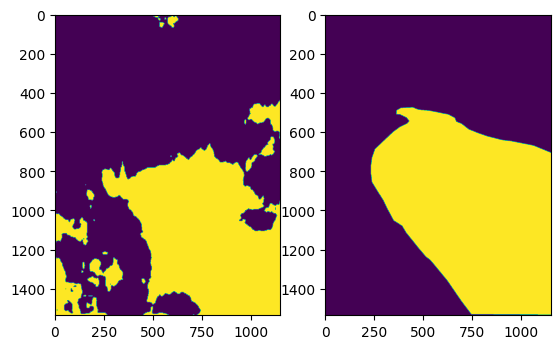

0.5979142079350136


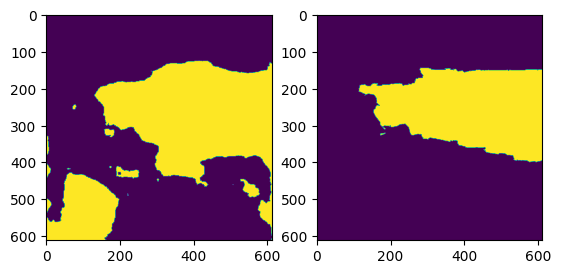

0.614843902544855


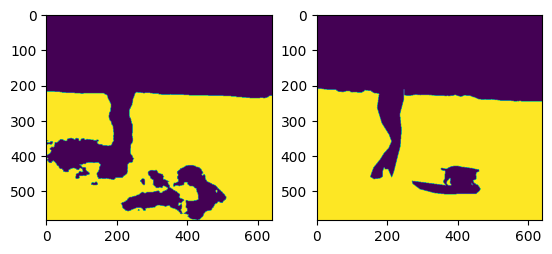

0.8208567023862443


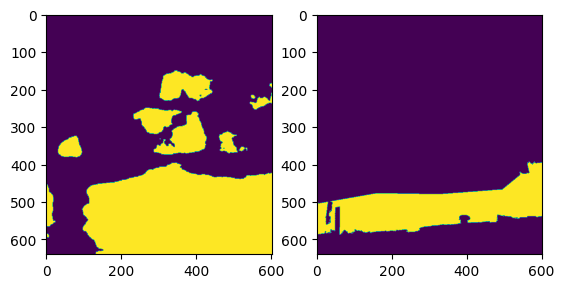

0.3361651006135496


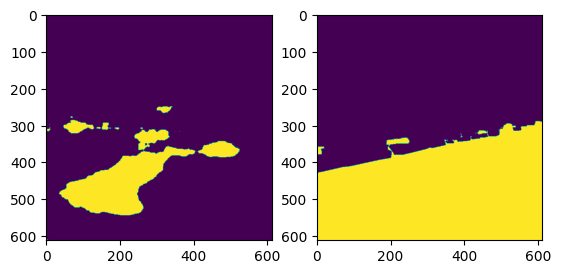

0.20731196770787122


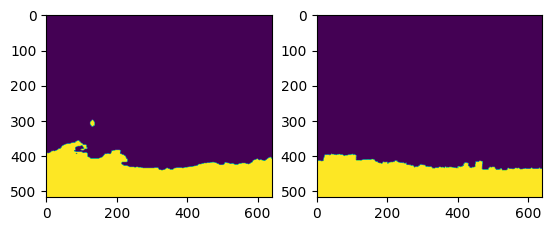

0.859705166906011


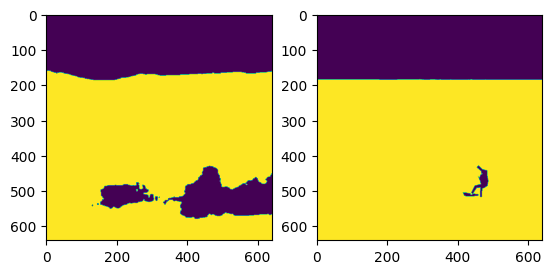

0.8646911241649622


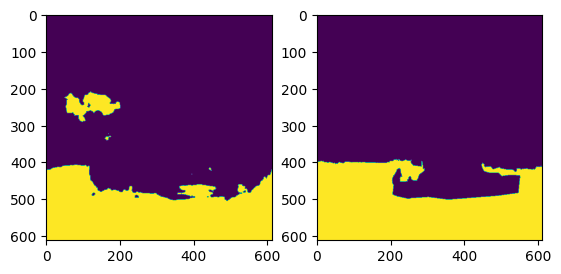

0.7639219419324131


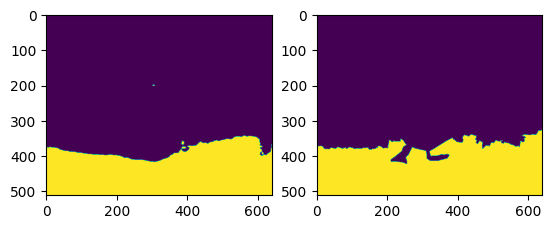

0.8486829373185679


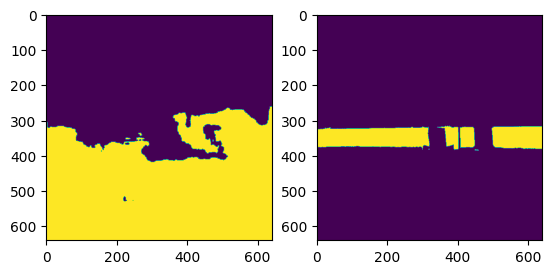

0.09317373820514982


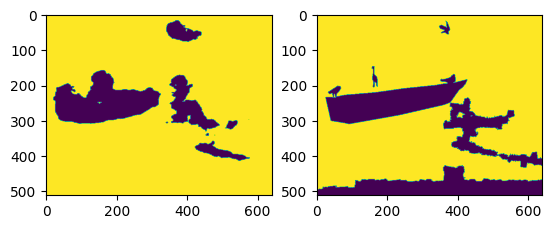

0.8304117049599633


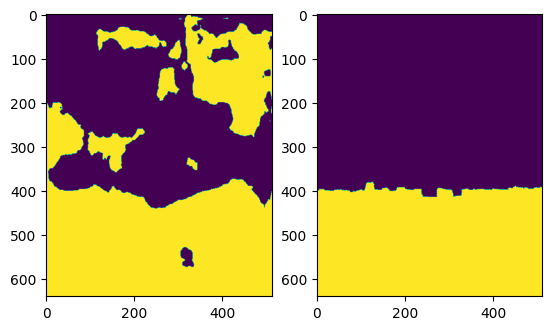

0.6497311738924033


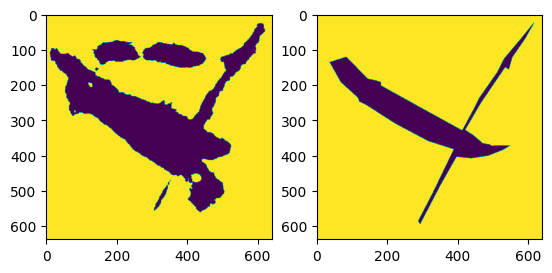

0.8333179688516767


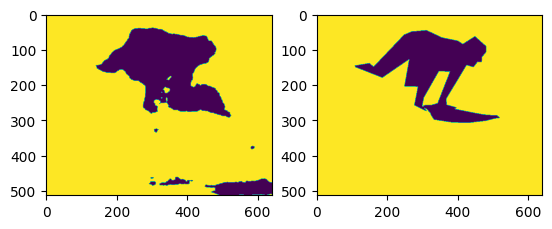

0.8911555391147055


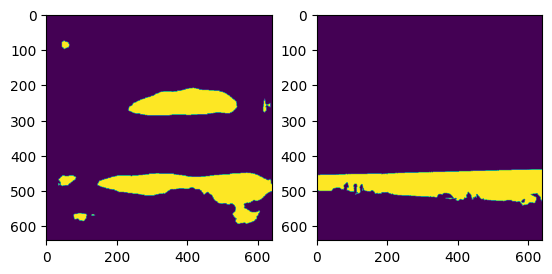

0.4171255803908865
10.784097706406419


In [ ]:
score = 0

for i in range(1,21):

    true = cv2.imread('dataset2/mask/'+str(i)+'.png', 0)
    pred = cv2.imread('dataset2/output/'+str(i)+'.png', 0)

    true = np.float32(true)
    pred = np.float32(pred)

    plt.subplot(1,2,1)
    plt.imshow(pred)
    plt.subplot(1,2,2)
    plt.imshow(true)
    plt.show()

    a, b = calculateIoU2(pred, true)
    print(a / b)
    score += a / b

print(score/20)
